# Project: Wrangling and Analyze Data (WeRateDogs)

## Table of Contents

- Introduction
- Gathering data
- Assessing data
- Quality issues
- Tidiness issues
- Cleaning data
- Storing, Analyzing, and Visualizing
- The First insight & visualization
- The second insight
- The third insight
- The Fourth Insight 
- The Fifth Insight & visualization
- The Sixth Insight & visualization

## Introduction


In this project I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in this Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and reports.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 9 million followers and has received international media coverage.



## Gathering data

- Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv

- The tweet image predictions: what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Twitter API & JSON:(In my case I did the following)file on hand, manual download of 'tweet-json.txt' and read the file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

## Data Gathering

1.download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Read the given(twitter_archive_enhanced.csv)file
df_archive=pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Using Requests library to download the image predictions file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

# Read the downloaded file into a dataframe 'df_image'
df_image= pd.read_csv('image-predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) or download this file 'tweet-json.txt' and read the file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [5]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

In [6]:
# Read the txt file line by line
twitter_list= []
with open('tweet-json.txt') as file:
    for line in file:
        twitter_list.append(json.loads(line))

print(twitter_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
#Convert the list of dictionaries to a pandas DataFrame
twitter_df=pd.DataFrame(twitter_list, columns = ['id','retweet_count','favorite_count'])

#Rename column (id to tweet_id)for merge later
twitter_df.rename(index=str, columns={"id": "tweet_id"}, inplace=True)
twitter_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data

#### Visual assessment

In [8]:
# Display the twitter archive table 
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
#Display the tweet image prediction table 
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
#Display the(twitter_df)table 
twitter_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Programmatic assessment

In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6+ KB


In [14]:
df_archive.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1271,709409458133323776,NaN,NaN,2016-03-14 16:02:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2214,668544745690562560,NaN,NaN,2015-11-22 21:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",It is an honor to rate this pup. He is a Snork...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668544745...,10,10,None,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1402,699423671849451520,NaN,NaN,2016-02-16 02:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699423671...,10,10,None,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None


In [15]:
sum(df_archive.tweet_id.duplicated())

0

In [16]:
sum(twitter_df.tweet_id.duplicated())

0

In [17]:
sum(df_image.jpg_url.duplicated())

66

In [18]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [19]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [20]:
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [21]:
df_archive.name.value_counts().head(40)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
Sadie        8
the          8
Bailey       7
Buddy        7
Toby         7
Daisy        7
an           7
Koda         6
Scout        6
Leo          6
Bella        6
Oscar        6
Milo         6
Jax          6
Stanley      6
Jack         6
Rusty        6
Dave         6
Oakley       5
George       5
Sammy        5
Gus          5
Alfie        5
Larry        5
Finn         5
Louis        5
Sunny        5
Chester      5
very         5
Name: name, dtype: int64

In [22]:
indexs_to_check=df_archive[df_archive['name']=='a'].index
indexs_to_check

Int64Index([  56,  649,  801, 1002, 1004, 1017, 1049, 1193, 1207, 1340, 1351,
            1361, 1368, 1382, 1499, 1737, 1785, 1853, 1854, 1877, 1878, 1923,
            1941, 1955, 1994, 2034, 2066, 2116, 2125, 2128, 2146, 2153, 2161,
            2191, 2198, 2211, 2218, 2222, 2235, 2249, 2255, 2264, 2273, 2287,
            2304, 2311, 2314, 2327, 2334, 2347, 2348, 2350, 2352, 2353, 2354],
           dtype='int64')

In [23]:
for index in indexs_to_check:
    print(df_archive.iloc[index]['text'])

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
People please. This i

It is clear,the name-a- values are words from the text that were misclassified by the algorithm that was used to find out the names.

### Quality issues
#### archive dataset
1.Delete columns that won't be used for analysis.

2.Incorrected ratings on numerator and denominator columns.

3.we keep only the original ratings (no retweets) that have images.

4.Name column have invalid names i.e 'such','the','a','an'.

5.Incorrected datatypes on tweet-id Convert to string instead of integer.

6.Some rows have more than one dog stage.

7.Incorrected datatypes on numerator and denominator columns Convert to float instead of integer.


#### images dataset
1.There is 2075 rows in the images dataframe compared to 2356 rows in the archive dataframe.

2.(66)duplicate photos is probably because of the retweet.

3.Delete columns that won't be used for analysis.

4.Incorrected datatypes on tweet-id Convert to string instead of integer.


#### twitter dataset - df_twitter -
1.Rename column (id to tweet_id)for merge and to make it more descriptive.

2.Incorrected datatypes on tweet-id Convert to string instead of integer.



### Tidiness issues
1.Create 1 column for image prediction -dog_type-.

2.Create 1 column for dog stage instead of 4 columns (doggo, floofer, pupper, puppo)-dog_stage-.

3.All tables should be part of one dataset


## Cleaning Data


In [24]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
twitter_df_clean = twitter_df.copy()

#### Define:
keep only the original ratings (no retweets) that have images

#### Code

In [25]:
#remove retweets to avoid analysizing same infomations by filtering the NaN of retweeted_status_user_id
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['retweeted_status_user_id'])]

#### Test

In [26]:
print(sum(df_archive_clean.retweeted_status_user_id.value_counts()))

0


#### Define:
Create 1 column for dog stage instead of 4 columns (doggo, floofer, pupper, puppo)-dog_stage-.and I noticed through the sample function that some rows have more than one dog stage. And we will store the multiple values with 'None'

#### Code

In [27]:
## To check the rows have more than one dog stage
df_archive_clean['check_dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo 
df_archive_clean.check_dog_stage.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: check_dog_stage, dtype: int64

In [28]:
# create function to check dog stages and register multiple values with "Multiple"
def check_stages(df_archive_clean):
    if df_archive_clean['check_dog_stage'].count('None') == 2:
        return 'Multiple' 
    else:
        if df_archive_clean['check_dog_stage'].count('doggo') == 1:
            return 'Doggo'
        elif df_archive_clean['check_dog_stage'].count('floofer') == 1:
            return 'Floofer'
        elif df_archive_clean['check_dog_stage'].count('pupper') == 1:
            return 'Pupper'
        elif df_archive_clean['check_dog_stage'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

df_archive_clean['dog_stage'] = df_archive_clean.apply(check_stages, axis=1)

#### Test

In [29]:
df_archive_clean['dog_stage'].value_counts()

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dog_stage, dtype: int64

In [30]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define:
Delete columns that won't be used for analysis

#### Code

In [31]:
#drop unused columns
df_archive_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
                       'retweeted_status_timestamp','timestamp','doggo','floofer',
                       'pupper', 'puppo', 'check_dog_stage'],axis=1, inplace=True)

#### Test

In [32]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   text                2175 non-null   object
 2   expanded_urls       2117 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   dog_stage           2175 non-null   object
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


#### Define:
fix some of the ratings columns(rating_numerator- rating_denominator)

#### code

In [33]:
#Find all denominators that are not equal to 10
check_denominators = df_archive_clean[df_archive_clean['rating_denominator'] != 10]

In [34]:
#Print out the text from each Tweet where the rating denominator is not equal to 10
counter = 0
for text in check_denominators.text:
    counter += 1
    print(text,'\n',sep = '')

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

@docmisterio account started on 11/15/15

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq

Happy Saturday here's 9 puppers on a bench. 99/90 good wor

Some of these rating_denominator values are also set to the denominator of the first fraction found in the text and not the actual rating fraction. These will be most easily dealt with by looking over and changing them manually.and also After looking over many of these tweets with uncommon rating values, it's become clear that some of these tweets are replies or retweets that do not actually have a real dog, or a real rating. These all need to be removed to ensure that they do not impact any analysis.


In [35]:
#Find all numerators greater than 17
check_numerators = df_archive_clean[df_archive_clean['rating_numerator'] > 17]

In [36]:
#Print out the text from each Tweet where the rating numerator is bigger than 17
counter = 0
for text in check_numerators.text:
    counter += 1
    print(text,'\n',sep = '')

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research

@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10

@markhoppus 182/10

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

This is Atticu

#### Define:
Here also above, we have noticed that there are fractional values, some of which will be manually modified and the data type will be changed to float.

#### Code

In [37]:
#Find fractional numbers through text and try to fix them
with pd.option_context('max_colwidth', 200):
    display(df_archive_clean[df_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [38]:
#Change the data type to float
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype('float')
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype('float')

In [39]:
#manually correct the values according to the right values in the text
df_archive_clean.loc[(df_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_archive_clean.loc[(df_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_archive_clean.loc[(df_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_archive_clean.loc[(df_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_archive_clean.loc[(df_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### test

In [40]:
with pd.option_context('max_colwidth', 200):
    display(df_archive_clean[df_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [41]:
#Manually fixing some denominators
pd.set_option('display.max_colwidth', -1)
df_archive_clean.loc[df_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

<ipython-input-41-654a166c21b1>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0


In [42]:
#Correct some values manually according to the correct values in the text
df_archive_clean.loc[df_archive_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df_archive_clean.loc[df_archive_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df_archive_clean.loc[df_archive_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df_archive_clean.loc[df_archive_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df_archive_clean.loc[df_archive_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]

In [43]:
#Remove denominators not equal to 10
df_archive_clean.drop(df_archive_clean[df_archive_clean['rating_denominator']!=10].index, inplace=True)

In [44]:
#test
df_archive_clean.rating_denominator.value_counts()

10.0    2153
Name: rating_denominator, dtype: int64

In [45]:
#Rating_numberator that are over 20 could be due to mistakes. removing the outliers to give more accurate data.
df_archive_clean.drop(df_archive_clean[df_archive_clean['rating_numerator']>=20].index, inplace=True)

In [46]:
#test
df_archive_clean.rating_numerator.value_counts()

12.00    500
10.00    442
11.00    425
13.00    307
9.00     155
8.00     98 
7.00     53 
14.00    43 
5.00     34 
6.00     32 
3.00     19 
4.00     15 
2.00     9  
1.00     7  
0.00     2  
9.50     1  
13.50    1  
11.27    1  
15.00    1  
11.26    1  
9.75     1  
17.00    1  
Name: rating_numerator, dtype: int64

#### Define:
Create 1 column for image prediction -dog type- and 1 column for p_conf -confidence_level-.and Delete photos that are not categorized as dog photos p_dog=FALSE

#### code

In [47]:
#Create a function that takes the first "true" confidence level and prediction as a priority.will be store in tow list:
#-algorithm_prediction- for a dog_type and algorithm_confident for confidence interval.and Storing photos that are not 
#categorized as dog photos stored as 'incorrect' to be deleted.


algorithm_prediction = []
algorithm_confident = []

def image(df_image_clean):
    if df_image_clean['p1_dog'] == True:
        algorithm_prediction.append(df_image_clean['p1'])
        algorithm_confident.append(df_image_clean['p1_conf'])
    elif df_image_clean['p2_dog'] == True:
        algorithm_prediction.append(df_image_clean['p2'])
        algorithm_confident.append(df_image_clean['p2_conf'])
    elif df_image_clean['p3_dog'] == True:
        algorithm_prediction.append(df_image_clean['p3'])
        algorithm_confident.append(df_image_clean['p3_conf'])
    else:
        algorithm_prediction.append('incorrect')
        algorithm_confident.append('incorrect')

df_image_clean.apply(image, axis=1)

#Create new columns and fill them with lists
df_image_clean['dog_type'] = algorithm_prediction
df_image_clean['algorithm_confident'] = algorithm_confident

In [48]:
#drop rows that has'incorrect' values
df_image_clean = df_image_clean[df_image_clean['dog_type'] != 'incorrect']

In [49]:
#test 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1751 non-null   int64  
 1   jpg_url              1751 non-null   object 
 2   img_num              1751 non-null   int64  
 3   p1                   1751 non-null   object 
 4   p1_conf              1751 non-null   float64
 5   p1_dog               1751 non-null   bool   
 6   p2                   1751 non-null   object 
 7   p2_conf              1751 non-null   float64
 8   p2_dog               1751 non-null   bool   
 9   p3                   1751 non-null   object 
 10  p3_conf              1751 non-null   float64
 11  p3_dog               1751 non-null   bool   
 12  dog_type             1751 non-null   object 
 13  algorithm_confident  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [50]:
# drop unused columns
df_image_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3','p3_conf', 
                                      'p3_dog'],axis=1, inplace=True)

In [51]:
#test 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             1751 non-null   int64 
 1   jpg_url              1751 non-null   object
 2   dog_type             1751 non-null   object
 3   algorithm_confident  1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


#### Define:
Name column have invalid names i.e 'such','the','a','an'.replace invalid names as 'None'.

In [52]:
#check the invalid names  
Check_names = []
for name in df_archive_clean.name:
    if str(name)[0].islower() and pd.isnull(name) == False:
        Check_names.append(name)
print(Check_names)

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


Many of the name values are incorrectly set to words from the text value when they should be 'None'.

In [53]:
df_archive_clean.replace({'name': r'^[a-z].*'}, {'name': 'None'}, regex=True, inplace=True)

In [54]:
#test  
Check_names = []
for name in df_archive_clean.name:
    if str(name)[0].islower() and pd.isnull(name) == False:
        Check_names.append(name)
print(len(Check_names))

0


#### Define:
Rename column (Name to dog_name) for make it more descriptive

#### code:

In [55]:
#Rename the Name column to make it more descriptive
df_archive_clean.rename(index=str, columns={"name": "dog_name"}, inplace=True)
#test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2148 non-null   int64  
 1   text                2148 non-null   object 
 2   expanded_urls       2097 non-null   object 
 3   rating_numerator    2148 non-null   float64
 4   rating_denominator  2148 non-null   float64
 5   dog_name            2148 non-null   object 
 6   dog_stage           2148 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 134.2+ KB


In [56]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6+ KB


In [57]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             1751 non-null   int64 
 1   jpg_url              1751 non-null   object
 2   dog_type             1751 non-null   object
 3   algorithm_confident  1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


In [58]:
#merge the three tables
df_merge = pd.merge(left=df_archive_clean, right=twitter_df_clean, how='left', on='tweet_id')
df_merge = pd.merge(left=df_merge, right=df_image_clean, how='left', on='tweet_id')

In [59]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2147
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2148 non-null   int64  
 1   text                 2148 non-null   object 
 2   expanded_urls        2097 non-null   object 
 3   rating_numerator     2148 non-null   float64
 4   rating_denominator   2148 non-null   float64
 5   dog_name             2148 non-null   object 
 6   dog_stage            2148 non-null   object 
 7   retweet_count        2148 non-null   int64  
 8   favorite_count       2148 non-null   int64  
 9   jpg_url              1669 non-null   object 
 10  dog_type             1669 non-null   object 
 11  algorithm_confident  1669 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 218.2+ KB


In [60]:
#drop rows with no image from the df_merge using the dropna() method
df_merge.dropna(axis = 0, inplace=True)

In [61]:
#test
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 1 to 2147
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1669 non-null   int64  
 1   text                 1669 non-null   object 
 2   expanded_urls        1669 non-null   object 
 3   rating_numerator     1669 non-null   float64
 4   rating_denominator   1669 non-null   float64
 5   dog_name             1669 non-null   object 
 6   dog_stage            1669 non-null   object 
 7   retweet_count        1669 non-null   int64  
 8   favorite_count       1669 non-null   int64  
 9   jpg_url              1669 non-null   object 
 10  dog_type             1669 non-null   object 
 11  algorithm_confident  1669 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 169.5+ KB


#### Define:
Delete(66)duplicate photos.

In [62]:
#code
sum(df_merge['jpg_url'].duplicated())

0

**Good, this problem has been resolved through previous analyzes**

#### Define:
Incorrected datatypes on tweet-id and dog_stage

#### code

In [63]:
#change the dtype of column dog_stage from object to category using the astype() function
#change the dtype of column tweet_id from int64 to object using the astype() function
df_merge.dog_stage = df_merge.dog_stage.astype('category')
df_merge. tweet_id = df_merge. tweet_id.astype('str')

In [64]:
#test
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 1 to 2147
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   tweet_id             1669 non-null   object  
 1   text                 1669 non-null   object  
 2   expanded_urls        1669 non-null   object  
 3   rating_numerator     1669 non-null   float64 
 4   rating_denominator   1669 non-null   float64 
 5   dog_name             1669 non-null   object  
 6   dog_stage            1669 non-null   category
 7   retweet_count        1669 non-null   int64   
 8   favorite_count       1669 non-null   int64   
 9   jpg_url              1669 non-null   object  
 10  dog_type             1669 non-null   object  
 11  algorithm_confident  1669 non-null   object  
dtypes: category(1), float64(2), int64(2), object(7)
memory usage: 158.3+ KB


## Storing Data
Store the clean DataFrame in a CSV file named "twitter_archive_master.csv".

In [65]:
# Store the clean DataFrame in a CSV file
df_merge.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [66]:
import seaborn as sns 
sns.set_palette('Set2')

In [67]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1669 non-null   int64  
 1   text                 1669 non-null   object 
 2   expanded_urls        1669 non-null   object 
 3   rating_numerator     1669 non-null   float64
 4   rating_denominator   1669 non-null   float64
 5   dog_name             1669 non-null   object 
 6   dog_stage            1669 non-null   object 
 7   retweet_count        1669 non-null   int64  
 8   favorite_count       1669 non-null   int64  
 9   jpg_url              1669 non-null   object 
 10  dog_type             1669 non-null   object 
 11  algorithm_confident  1669 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 156.6+ KB


### which The Most 10 Common Breeds of Dogs on We Rate Dogs?

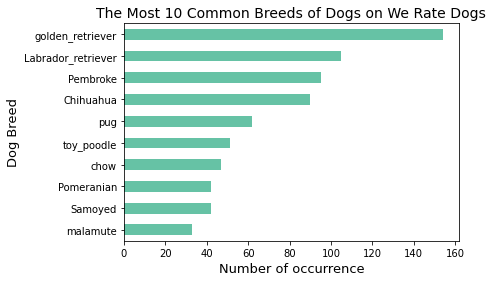

In [68]:
df_master['dog_type'].value_counts()[9::-1].plot(kind='barh')
plt.title('The Most 10 Common Breeds of Dogs on We Rate Dogs',fontsize=14)
plt.xlabel('Number of occurrence',fontsize=13)
plt.ylabel('Dog Breed',fontsize=13)
plt.fontsize = 15

The Golden Retriever has the most amount of Number of occurrence, followed by the Labrador Retriever and Pembroke.

### Which tweet had the most re-tweets?

In [69]:
#the top 5 tweet has the most retweets.
df_master.sort_values(by='retweet_count', ascending=False).head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,jpg_url,dog_type,algorithm_confident
688,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,Doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333
361,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10.0,Stephan,None,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.505370
715,739238157791694849,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10.0,None,Doggo,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,Eskimo_dog,0.503372
278,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,None,Puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
53,879415818425184262,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10.0,Duddles,None,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,English_springer,0.383404


In [70]:
#The Tweet with the most retweets.
df_master[df_master['tweet_id']==744234799360020481]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,jpg_url,dog_type,algorithm_confident
688,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,Doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333


This is the tweet with the most retweets in our data set. The most important information about these tweets is:
- Text: "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)".
- rating: 13/10.
- retweet count: 79515.
- favorite count: 131075.
- dog type:Labrador retriever.
- dog stage:Doggo
- expanded urls:https://twitter.com/dog_rates/status/744234799360020481/video/1	
- Note:In fact, the tweet contains a video, not an image.

In [71]:
#Photo of the dog with the most retweets
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

### Which tweet had the most favorites	?

In [72]:
#The five tweets with the highest number of likes.
df_master.sort_values(by='favorite_count', ascending=False).head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,jpg_url,dog_type,algorithm_confident
278,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,None,Puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
688,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,Doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333
53,879415818425184262,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10.0,Duddles,None,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,English_springer,0.383404
361,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10.0,Stephan,None,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.505370
100,866450705531457537,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,10.0,Jamesy,Pupper,32883,106827,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334


In [73]:
## The tweet with the most likes.
df_master[df_master['tweet_id']==822872901745569793]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,jpg_url,dog_type,algorithm_confident
278,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,None,Puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015


This is the tweet with the most likes in our data set. The most important information about these tweets is:
- Text: "Here's a super supportive puppo participating in the Toronto".
- rating: 13/10.
- retweet count: 48265.
- favorite count: 132810.
- dog type:Lakeland terrier.
- dog stage:Puppo
- expanded urls:https://twitter.com/dog_rates/status/822872901745569793/photo/1
- Note: he so cute ^_^.

In [74]:
#Photo of the dog with the most likes.
Image(url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')

### Which dog stages have the highest average rating?

In [75]:
df_master.groupby('dog_stage')['rating_numerator'].describe() 

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
Doggo,54.0,11.925926,1.385257,8.0,11.00,12.0,13.0,14.0
Floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
Multiple,10.0,11.300000,2.311805,5.0,11.25,12.0,12.0,13.0
None,1409.0,10.768282,1.815383,0.0,10.00,11.0,12.0,14.0
Pupper,168.0,10.864702,1.405715,7.0,10.00,11.0,12.0,14.0
Puppo,21.0,11.952381,1.321975,9.0,11.00,12.0,13.0,14.0


As we can see through the statistics, the stage of the dog with the highest average rating is Floofer(12.00) followed by Puppo (11.95), Doggo(11.92) and the last Pupper(10.86).

### Which is the most common dog names?

In [76]:
df_master.dog_name.value_counts().head(10)

None       485
Lucy       10 
Cooper     10 
Charlie    10 
Oliver     9  
Tucker     9  
Penny      8  
Sadie      7  
Daisy      7  
Winston    7  
Name: dog_name, dtype: int64

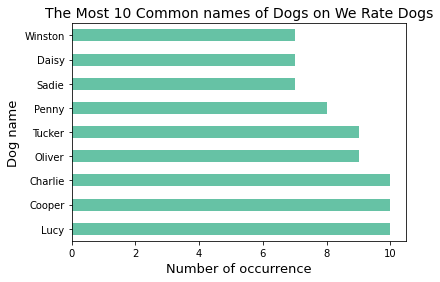

In [77]:
df_master['dog_name'].value_counts()[1:10].plot(kind='barh')
plt.title('The Most 10 Common names of Dogs on We Rate Dogs',fontsize=14)
plt.xlabel('Number of occurrence',fontsize=13)
plt.ylabel('Dog name',fontsize=13)
plt.fontsize = 15

Several dog names correlate with a value of 10 in this data set, including Charlie,Cooper,and Lucy.and There are those mentioned 9 times like Tucker,Oliver.

###  What is the relationship between retweets and likes?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


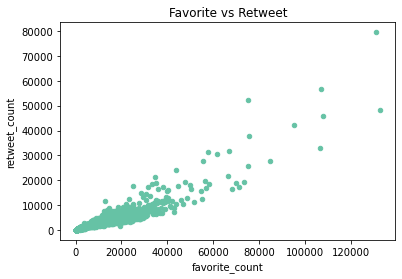

In [78]:
df_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite vs Retweet');

In [79]:
df_master['favorite_count'].corr(df_master['retweet_count'])

0.9133141187679014

The correlation coefficient beteen retweet_count and favorite_count is 0.913, which is close to 1 and positive demonstrating a strong positive correlation bewteen those two metrics.